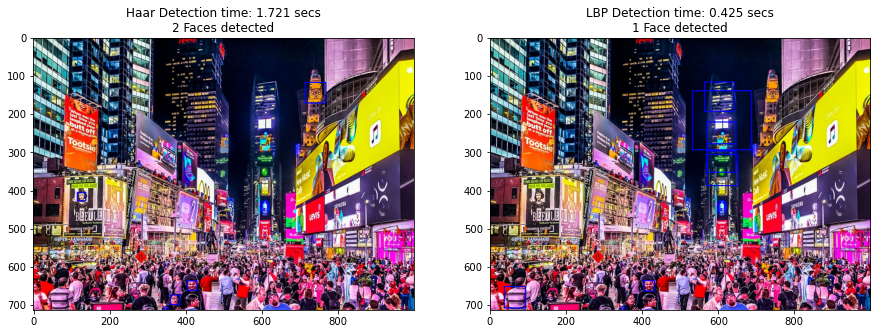

In [10]:
"""
Haar Cascade Face detection with OpenCV  
    Based on tutorial by superdatascience.com && docs.opencv.org
    Visit original posts: https://www.superdatascience.com/blogs/opencv-face-recognition, https://docs.opencv.org/3.4/db/d28/tutorial_cascade_classifier.html
Adapted by Alioune LO - Z01D3R @ 7Jun2022 

"""

import cv2
import time
import matplotlib.pyplot as plt

def convertToRGB(img): 
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)



#-- Detect and display Face
def detectFaces(cascade, img, scaleFactor=1.028) :
    
    img_copy = img.copy()
    gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)

    #-- Detect Faces
    faces = cascade.detectMultiScale(gray, scaleFactor=scaleFactor, minNeighbors=5)
    for (x,y,w,h) in faces : 
        cv2.rectangle(img_copy, (x,y), (x+w, y+h), (255, 0, 0), 2)

    #-- Display Faces
    #cv2.imshow('Capture - Face Detection', img_copy)
    return img_copy,len(faces)
    #print("Faces found :", len(faces))

haar_cascade =  cv2.CascadeClassifier('../opencv-3.4/data/haarcascades/haarcascade_frontalface_alt.xml')
lbp_cascade = cv2.CascadeClassifier('../opencv-3.4/data/lbpcascades/lbpcascade_frontalface.xml')

#-- There are 55 faces on this image
img = cv2.imread('../images/timeSquare.jpeg')

facesLen = 0

#-- Time execution for LBP cascade
ta = time.time()
lbp,lbpDetected = detectFaces(lbp_cascade,img)
#plt.imshow(convertToRGB(lbp))
tb = time.time()
dt = tb- ta

#-- Time execution for Haar Cascade 
t1 = time.time()
haar,haarDetected = detectFaces(haar_cascade,img)
t2 = time.time()
dt1 = t2 - t1

#-- Let's do the comparison
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10))

ax1.set_title('Haar Detection time: ' + str(round(dt1, 3)) + ' secs' + '\n2 Faces detected')
ax1.imshow(convertToRGB(haar))

ax2.set_title('LBP Detection time: ' + str(round(dt, 3)) + ' secs'+ '\n1 Face detected')
ax2.imshow(convertToRGB(lbp))



cv2.waitKey(0)
cv2.destroyAllWindows()